# Generative Adverserial Networks in PyTorch

Deep neural networks are used mainly for supervised learning: classification or regression. Generative Adverserial Networks or GANs, however, use neural networks for a very different purpose: Generative modeling

> Generative modeling is an unsupervised learning task in machine learning that involves automatically discovering and learning the regularities or patterns in input data in such a way that the model can be used to generate or output new examples that plausibly could have been drawn from the original dataset. - [Source](https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/)

While there are many approaches used for generative modeling, a Generative Adverserial Network takes the following approach: 

![GAN Flowchart](https://i.imgur.com/6NMdO9u.png)

There are two neural networks: a *Generator* and a *Discriminator*. The generator generates a "fake" sample given a random vector/matrix, and the discriminator attempts to detect whether a given sample is "real" (picked from the training data) or "fake" (generated by the generator). Training happens in tandem: we train the discriminator for a few epochs, then train the generator for a few epochs, and repeat. This way both the generator and the discriminator get better at doing their jobs. This rather simple approach can lead to some astounding results. The following images ([source](https://machinelearningmastery.com/resources-for-getting-started-with-generative-adversarial-networks/)), for instances, were all generated using GANs:

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/04/Example-of-Photorealistic-Human-Faces-Generated-by-a-GAN.png" alt="gans_results" width="480">


GANs however, can be notoriously difficult to train, and are extremely sensitive to hyperparameters, activation functions and regularization. In this tutorial, we'll train a GAN to generate images of handwritten digits similar to those from the MNIST database.

<img src="https://i.imgur.com/CAYnuo1.jpg" width="360" >

Most of the code for this tutorial has been borrowed for this excellent repository of PyTorch tutorials: [github.com/yunjey/pytorch-tutorial](https://github.com/yunjey/pytorch-tutorial). Here's what we're going to do:

* Define the problem statement
* Load the data (with transforms and normalization)
    * Denormalize for visual inspection of samples
* Define the Discriminator network
    * Study the activation function: Leaky ReLU
* Define the Generator network
    * Explain the output activation function: TanH
    * Look at some sample outputs
* Define losses, optimizers and helper functions for training
    * For discriminator
    * For generator
* Train the model
    * Save intermediate generated images to file
* Look at some outputs
* Save the models
* Commit to Jovian.ml

## Load the Data

We begin by downloading and importing the data as a PyTorch dataset using the `MNIST` helper class from `torchvision.datasets`.

In [198]:
import torch
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import MNIST
import numpy as np

mnist = MNIST(root='data', 
              train=True, 
              download=True,
              transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]))

Note that we are are transforming the pixel values from the range `[0, 1]` to the range `[-1, 1]`. The reason for doing this will become clear when define the generator network. Let's look at a sample tensor from the data.

In [2]:
img, label = mnist[0]
print('Label: ', label)
print(img[:,10:15,10:15])
torch.min(img), torch.max(img)

img.shape

Label:  5
tensor([[[-0.9922,  0.2078,  0.9843, -0.2941, -1.0000],
         [-1.0000,  0.0902,  0.9843,  0.4902, -0.9843],
         [-1.0000, -0.9137,  0.4902,  0.9843, -0.4510],
         [-1.0000, -1.0000, -0.7255,  0.8902,  0.7647],
         [-1.0000, -1.0000, -1.0000, -0.3647,  0.8824]]])


torch.Size([1, 28, 28])

As expected, the pixel values range from -1 to 1. Let's define a helper to denormalize and view the images. This function will also be useful for viewing the generated images.

In [3]:
def denorm(x):

    '''
    for normalizing -0.5 and / 0.5 
    for denormalizing +0.5 and * 0.5 

    normalize :  x - 0.5 / 0.5 

    denormalize : x * 0.5 + 0.5 

    out  = (x+1)/2

    out  = x/2 + 1/2

    out = 0.5x + 0.5 

    '''

    out = (x + 1) / 2


    return out.clamp(0, 1)

Label: 5


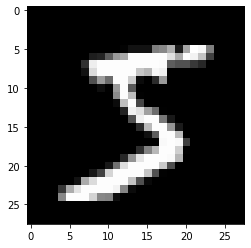

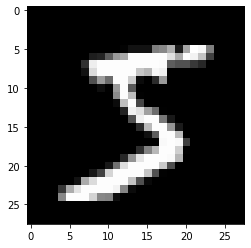

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

img_norm = denorm(img)
plt.imshow(img_norm[0], cmap='gray')
print('Label:', label)

plt.figure()

plt.imshow(img[0],cmap = 'gray')

Finally, let's create a dataloader to load the images in batches.

In [113]:
from torch.utils.data import DataLoader

batch_size = 100
data_loader = DataLoader(mnist, batch_size, shuffle=True)

first batch
torch.Size([100, 1, 28, 28])
tensor([9, 8, 4, 9, 5, 2, 1, 9, 1, 3, 0, 6, 3, 3, 6, 0, 5, 5, 1, 8, 1, 6, 5, 1,
        7, 9, 7, 8, 3, 7, 1, 1, 8, 4, 5, 8, 3, 3, 2, 3, 4, 2, 4, 4, 6, 0, 9, 2,
        3, 1, 9, 8, 5, 5, 6, 6, 4, 8, 8, 4, 4, 0, 2, 2, 2, 7, 9, 9, 6, 2, 1, 2,
        2, 4, 6, 6, 0, 2, 1, 0, 2, 0, 9, 3, 0, 9, 4, 6, 6, 9, 8, 3, 7, 7, 8, 9,
        9, 7, 7, 0])


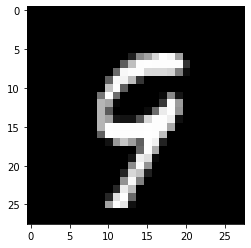

In [114]:
for img_batch, label_batch in data_loader:
    print('first batch')
    print(img_batch.shape)
    plt.imshow(img_batch[0][0], cmap='gray')
    print(label_batch)
    break

We'll also create a `device` which can be used to move the data and models to a GPU, if one is available.

In [6]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
device

device(type='cuda')

## Discriminator Network


## Generator Network


CGAN COnditional Gans

In [191]:
n_classes = 10
image_size = 784
hidden_size = 256

latent_size = 64

batch_size  = 100


class Discriminator_CGAN(nn.Module):

  def __init__(self):

    super(Discriminator_CGAN,self).__init__()


    self.label_encoder = nn.Embedding(n_classes,n_classes)

    self.model = nn.Sequential(
                        nn.Linear(image_size + n_classes, hidden_size),
                        nn.LeakyReLU(0.2),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(0.2),
                        nn.Linear(hidden_size, 1),
                      
                        
                      )

  


  def forward(self,x,labels):

    input =  torch.cat((x.view(x.size(0), -1), self.label_encoder(labels)), -1)

    return self.model(input)


class Generator_CGAN(nn.Module):
    def __init__(self):
        super(Generator_CGAN, self).__init__()

        self.label_encoder = nn.Embedding(n_classes, n_classes)

        self.model = nn.Sequential(
                        nn.Linear(latent_size + n_classes, hidden_size),
                        nn.LeakyReLU(0.2),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(0.2),
                        nn.Linear(hidden_size,image_size),
                        nn.Tanh()
                        
                      )

    def forward(self, noise, labels):
        # Concatenate label embedding and image to produce input
        gen_input = torch.cat((self.label_encoder(labels), noise), -1)
        img = self.model(gen_input)
        img = img.view(img.size(0),1,28,28)
        return img





In [183]:
Generator_CGAN().forward(torch.rand(2,64),torch.tensor([1,1])).shape

torch.Size([2, 1, 28, 28])

In [167]:
Discriminator_CGAN().forward(torch.rand(2,784),torch.tensor([1,1]))

tensor([[0.0591],
        [0.0988]], grad_fn=<AddmmBackward>)

In [193]:
G = Generator_CGAN()
D = Discriminator_CGAN()

#loss function

# criterion = nn.BCELoss()

criterion = nn.MSELoss()

D.to(device)
G.to(device)

d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

In [194]:
def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

def train_discriminator(images,labels):

    '''
    while training the discriminator we need the images and the labels 
    for labels we use 1 for real and 0 for fake 
    output of discriminator is (batch_size,1)

    Here we also require the generated fake images 

    note: the descriminator doesnt take 2 images at the same time, its  a simple binary classifier 

    1. so feed real image then calculate the loss 
    2. then feed the fake image and calculate the loss


    we are not training the generator over here.


    '''


    # Create the labels which are later used as input for the BCE loss
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)
        
    # Loss for real images
    outputs = D(images,labels)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Loss for fake images
    z = torch.randn(batch_size, latent_size).to(device)
    gen_labels = torch.LongTensor(np.random.randint(0, n_classes, batch_size)).to(device)

    fake_images = G(z,gen_labels)
    outputs = D(fake_images,gen_labels)

    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Combine losses
    d_loss = d_loss_real + d_loss_fake
    # Reset gradients
    reset_grad()
    # Compute gradients
    d_loss.backward()
    # Adjust the parameters using backprop
    d_optimizer.step()
    
    return d_loss, real_score, fake_score

In [195]:
def train_generator():
    '''
    by setting the labels to 1 the initial loss will be hight 
    as the optimizer (adam ) will try to reduce it. 

    '''
    # Generate fake images and calculate loss
    z = torch.randn(batch_size, latent_size).to(device)
    gen_labels = torch.LongTensor(np.random.randint(0, n_classes, batch_size)).to(device)
    fake_images = G(z,gen_labels)

    labels = torch.ones(batch_size, 1).to(device)

    g_loss = criterion(D(fake_images,gen_labels), labels)

    # Backprop and optimize
    reset_grad()
    g_loss.backward()
    g_optimizer.step()
    return g_loss, fake_images

## EDA

Let's create a directory where we can save intermediate outputs from the generator to visually inspect the progress of the model

In [196]:
import os

sample_dir = 'samples_cgan'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

Let's save a batch of real images that we can use for visual comparision while looking at the generated images.

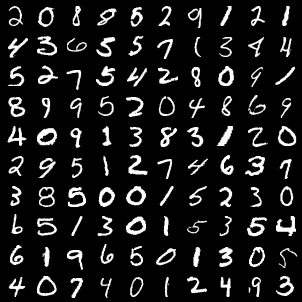

In [188]:
from IPython.display import Image
from torchvision.utils import save_image

# Save some real images
for images, _ in data_loader:
    images = images.reshape(images.size(0), 1, 28, 28)
    save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'), nrow=10)
    break
   
Image(os.path.join(sample_dir, 'real_images.png'))

We'll also define a helper function to save a batch of generated images to disk at the end of every epoch. We'll use a fixed set of input vectors to the generator to see how the individual generated images evolve over time as we train the model.

Saving fake_images-0000.png


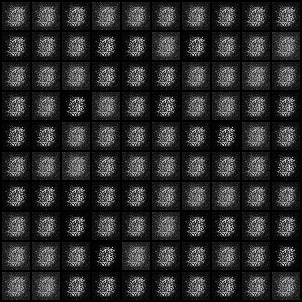

In [201]:
sample_vectors = torch.randn(batch_size, latent_size).to(device)
sample_labels = torch.LongTensor(np.random.randint(0,10,batch_size)).to(device)

def save_fake_images(index):
    fake_images = G(sample_vectors,sample_labels)
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
    print('Saving', fake_fname)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=10)
    
# Before training
save_fake_images(0)
Image(os.path.join(sample_dir, 'fake_images-0000.png'))

We are now ready to train the model. In each epoch, we train the discriminator first, and then the generator. The training might take a while if you're not using a GPU.

# Training Method


In [202]:
%%time

num_epochs = 300
total_step = len(data_loader)
d_losses, g_losses, real_scores, fake_scores = [], [], [], []

for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(data_loader):
        # Load a batch & transform to vectors
        
        # print(images.shape)

        # Train the discriminator and generator
        d_loss, real_score, fake_score = train_discriminator(images.to(device),labels.to(device))
        g_loss, fake_images = train_generator()
        
        # Inspect the losses
        if (i+1) % 200 == 0:
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
        
    # Sample and save images
    save_fake_images(epoch+1)

Epoch [0/300], Step [200/600], d_loss: 0.1094, g_loss: 0.7956, D(x): 0.77, D(G(z)): 0.04
Epoch [0/300], Step [400/600], d_loss: 0.0598, g_loss: 1.0223, D(x): 0.87, D(G(z)): 0.09
Epoch [0/300], Step [600/600], d_loss: 0.0654, g_loss: 0.8733, D(x): 0.99, D(G(z)): 0.11
Saving fake_images-0001.png
Epoch [1/300], Step [200/600], d_loss: 0.0559, g_loss: 1.1110, D(x): 0.94, D(G(z)): -0.00
Epoch [1/300], Step [400/600], d_loss: 0.0539, g_loss: 1.0034, D(x): 0.89, D(G(z)): 0.04
Epoch [1/300], Step [600/600], d_loss: 0.0797, g_loss: 0.8846, D(x): 0.92, D(G(z)): 0.08
Saving fake_images-0002.png
Epoch [2/300], Step [200/600], d_loss: 0.0986, g_loss: 0.9238, D(x): 0.86, D(G(z)): 0.12
Epoch [2/300], Step [400/600], d_loss: 0.0663, g_loss: 0.9822, D(x): 0.93, D(G(z)): 0.10
Epoch [2/300], Step [600/600], d_loss: 0.0587, g_loss: 1.0629, D(x): 0.96, D(G(z)): 0.07
Saving fake_images-0003.png
Epoch [3/300], Step [200/600], d_loss: 0.1013, g_loss: 0.9845, D(x): 0.92, D(G(z)): 0.19
Epoch [3/300], Step [400/

KeyboardInterrupt: ignored

In [203]:
# Save the model checkpoints 
torch.save(G.state_dict(), 'G_CGAN_epochs_220.ckpt')
torch.save(D.state_dict(), 'D_CGAN_epochs_220.ckpt')

Here's how the generated images look, after the 10th, 50th, 100th and 300th epochs of training.

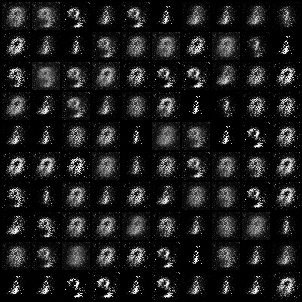

In [ ]:
Image('./samples/fake_images-0010.png')

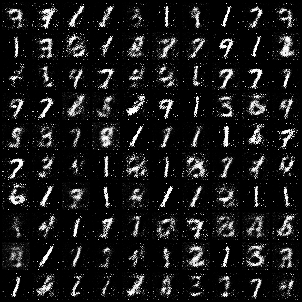

In [ ]:
Image('./samples/fake_images-0050.png')

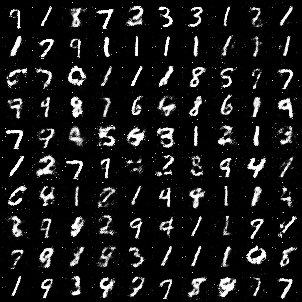

In [204]:
Image('./samples/fake_images-0100.png')

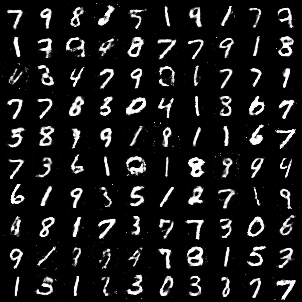

In [ ]:
Image('./samples/fake_images-0300.png')

We can visualize the training process by combining the sample images generated after each epoch into a video using OpenCV.

In [205]:
import cv2
import os
from IPython.display import FileLink

print(sample_dir)
vid_fname = 'cgans_training.mp4'

files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'fake_images' in f]
files.sort()

out = cv2.VideoWriter(vid_fname,cv2.VideoWriter_fourcc(*'MP4V'), 8, (302,302))
[out.write(cv2.imread(fname)) for fname in files]
out.release()
FileLink(vid_fname)

samples_cgan


/content/cgans_training.mp4

You can view the animated training video here: https://www.youtube.com/watch?v=R7HTX79JlBg

We can also visualize how the loss changes over time. Visualizing losses is quite useful for debugging the training process. For GANs, we expect the generator's loss to reduce over time, without the discriminator's loss getting too high.

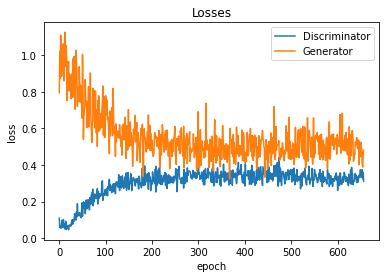

In [206]:
plt.plot(d_losses, '-')
plt.plot(g_losses, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

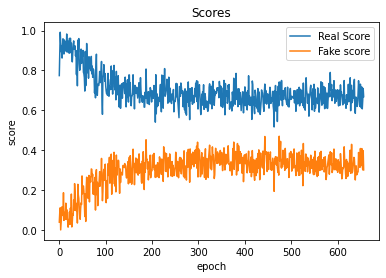

In [207]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real Score', 'Fake score'])
plt.title('Scores');

## Save and Commit

We can caputre a snapshot of our work (including the Jupyter notebook, sample images and trained models) using the `jovian` Python library.

In [208]:
# Install the library
!pip install jovian --upgrade -q

     |████████████████████████████████| 71kB 2.4MB/s 


In [209]:
# Import the library
import jovian

In [211]:
jovian.commit()

[jovian] Error: Failed to detect Jupyter notebook or Python script. Skipping..


In [210]:
jovian.commit(outputs=['samples/fake_images-0000.png', 
                       'samples/fake_images-0010.png', 
                       'samples/fake_images-0025.png', 
                       'samples/fake_images-0050.png', 
                       'samples/fake_images-0100.png', 
                       'samples/fake_images-0150.png', 
                       'samples/fake_images-0200.png', 
                      ], 
              project='06-mnist-gan')

[jovian] Error: Failed to detect Jupyter notebook or Python script. Skipping..


Running `jovian.commit` uploads the Jupyter notebook and the associated files to your [Jovian.ml](https://www.jovian.ml) account. You can share the project online publicly, or collaborate privately with your friends & colleagues. Jovian also automatically captures the Python environment (dependencies & library versions), so that you & others can reproduce your work easily. Jovian also includes a powerful commenting interface for discussion. To learn more visit [www.jovian.ml](https://www.jovian.ml).

<img src="https://i.imgur.com/KVjXpd6.png">